# DERIBIT API EXPLORATION

In [1]:
import numpy as np 

ModuleNotFoundError: No module named 'numpy'

Start with the API key and secret code (Dont replicate, create ur own, there is a limit for minute request)

In [3]:
import websocket
import json

# Your Deribit credentials
api_key = 'x_uXagP8'
api_secret = 'ygSW1HwArk2tVnDU_FpByAZLMPJkaUx51Y56NS24DrI'

Index: Deribit create an bitcoin Index with data from Bitstamp, Coinbase Pro, Kraken, LMAX digital and others.
Open interest: total number of options that have not settled.
Underlying price: current market price of the asset or financial instrument in wich the option is based.
Index price: Price of the index.

## Get_Instruments

https://docs.deribit.com/#public-get_instruments 

Retrieves available trading instruments. This method can be used to see which instruments are available for trading, or which instruments have recently expired.

In [4]:


# Establish a connection to Deribit's WebSocket API
ws = websocket.create_connection('wss://www.deribit.com/ws/api/v2')

# Define your authentication message
auth_message = {
    "jsonrpc": "2.0",
    "id": 1,
    "method": "public/auth",
    "params": {
        "grant_type": "client_credentials",
        "client_id": api_key,
        "client_secret": api_secret
    }
}

# Send the authentication message
ws.send(json.dumps(auth_message))
response = ws.recv()
print(response)

# Define a message to get option trading information
options_message = {
    "jsonrpc": "2.0",
    "id": 2,
    "method": "public/get_instruments",
    "params": {
        "currency": "BTC",
        "kind": "option",
        "expired": False
    }
}

# Send the message to get options information
ws.send(json.dumps(options_message))
options_response = ws.recv()
print(options_response)

# Close the WebSocket connection
ws.close()


{"jsonrpc":"2.0","id":1,"result":{"token_type":"bearer","scope":"name:MQE block_trade:read connection trade:read wallet:read account:read custody:read mainaccount","refresh_token":"1746225604229.1Y2mp_9A.17VyhzQckjQOhPeM3eSRBduKJbWz7qJuLk_ycpUHpfrjGvaQ3XsQtZmwvaxdyhSNCKtSoqhusYQyr4sgUe8ahdIiu535rG44LgdgvL8lVImxwOg1HwocDwSLsdVA89bqPedEvJVLUBbPbQ8mHVr5wxqkzOMyN4GxxCW3Qkhapt5yPvVTkwMFSXLpr5iqzvPe9FFgVee1aimg97M5Y0t3cez_BLVksyzij41j91PMxkaJyo808HQmq9PzllZJanHlN9e-KYDMpGVjW9d9ukjFOKfvHZ-1i2pILpM9cV0_ZapWjMvTl0ifZwPvFw","expires_in":31536000,"access_token":"1746225604229.1csEHlFi.xTADR1co2RjvdHL3PlxOZ4PhE9kPVTFYKETZBkigC2_Fr68R79RMYHG3CuzEARUMYAdLenmvOrLU2stsCOnaRsKhyyfRjsOlUX0kBxSJAq_uhG5TNbGHR2TAfjWSqnFEtud0uA_CtK5XMRjfQ-ZJ1x3Hmh0LtycklOvpM3VSYpPeyidc2l0RihUCiO3uKSpYRhBsaTFVkosGRVtuqdDMo7XNoqCp9O27K4qJTesSLqJQMiqjYLRmLV3RFj_fQ4OQNUi8ciwLnUlpYMFQxXRXUijcIQ1S7SwdIiNURF0dWgnYnHyAvP9IXVP7tR0"},"usIn":1714689604229021,"usOut":1714689604229245,"usDiff":224,"testnet":false}
{"jsonrpc":"2.0","id":

In [23]:
json.loads(options_response)['result'][:5]

[{'tick_size_steps': [{'above_price': 0.005, 'tick_size': 0.0005}],
  'quote_currency': 'BTC',
  'min_trade_amount': 0.1,
  'counter_currency': 'USD',
  'settlement_period': 'day',
  'settlement_currency': 'BTC',
  'block_trade_tick_size': 0.0001,
  'block_trade_min_trade_amount': 25,
  'block_trade_commission': 0.0003,
  'option_type': 'call',
  'creation_timestamp': 1714551900000,
  'instrument_id': 322302,
  'base_currency': 'BTC',
  'tick_size': 0.0001,
  'contract_size': 1.0,
  'strike': 53000.0,
  'is_active': True,
  'expiration_timestamp': 1714636800000,
  'instrument_type': 'reversed',
  'instrument_name': 'BTC-2MAY24-53000-C',
  'taker_commission': 0.0003,
  'maker_commission': 0.0003,
  'kind': 'option',
  'rfq': False,
  'price_index': 'btc_usd'},
 {'tick_size_steps': [{'above_price': 0.005, 'tick_size': 0.0005}],
  'quote_currency': 'BTC',
  'min_trade_amount': 0.1,
  'counter_currency': 'USD',
  'settlement_period': 'day',
  'settlement_currency': 'BTC',
  'block_trade_ti

In [42]:
import json

# Assuming options_response is the JSON formatted string received from the Deribit API
options_response_2 = options_response

# Parse the JSON response
parsed_response = json.loads(options_response)

# Extract the result which contains the list of instruments
instruments = parsed_response.get('result', [])

# Format and print the information in a more readable way
for instrument in instruments:
    print(f"Instrument Name: {instrument['instrument_name']}")
    print(f"Base Currency: {instrument['base_currency']}")
    print(f"Strike: {instrument['strike']}")
    print(f"Option Type: {instrument['option_type']}")
    print(f"Settlement Period: {instrument['settlement_period']}")
    print("\n")


Instrument Name: BTC-28APR24-56000-C
Base Currency: BTC
Strike: 56000.0
Option Type: call
Settlement Period: day


Instrument Name: BTC-28APR24-56000-P
Base Currency: BTC
Strike: 56000.0
Option Type: put
Settlement Period: day


Instrument Name: BTC-28APR24-57000-C
Base Currency: BTC
Strike: 57000.0
Option Type: call
Settlement Period: day


Instrument Name: BTC-28APR24-57000-P
Base Currency: BTC
Strike: 57000.0
Option Type: put
Settlement Period: day


Instrument Name: BTC-28APR24-58000-C
Base Currency: BTC
Strike: 58000.0
Option Type: call
Settlement Period: day


Instrument Name: BTC-28APR24-58000-P
Base Currency: BTC
Strike: 58000.0
Option Type: put
Settlement Period: day


Instrument Name: BTC-28APR24-59000-C
Base Currency: BTC
Strike: 59000.0
Option Type: call
Settlement Period: day


Instrument Name: BTC-28APR24-59000-P
Base Currency: BTC
Strike: 59000.0
Option Type: put
Settlement Period: day


Instrument Name: BTC-28APR24-60000-C
Base Currency: BTC
Strike: 60000.0
Option Type:

In [43]:
json.loads(options_response_2)

{'jsonrpc': '2.0',
 'id': 2,
 'result': [{'tick_size_steps': [{'above_price': 0.005, 'tick_size': 0.0005}],
   'quote_currency': 'BTC',
   'min_trade_amount': 0.1,
   'counter_currency': 'USD',
   'settlement_period': 'day',
   'settlement_currency': 'BTC',
   'block_trade_tick_size': 0.0001,
   'block_trade_min_trade_amount': 25,
   'block_trade_commission': 0.0003,
   'option_type': 'call',
   'creation_timestamp': 1714040700000,
   'instrument_id': 320428,
   'base_currency': 'BTC',
   'tick_size': 0.0001,
   'contract_size': 1.0,
   'strike': 56000.0,
   'is_active': True,
   'expiration_timestamp': 1714291200000,
   'instrument_type': 'reversed',
   'instrument_name': 'BTC-28APR24-56000-C',
   'taker_commission': 0.0003,
   'maker_commission': 0.0003,
   'kind': 'option',
   'rfq': False,
   'price_index': 'btc_usd'},
  {'tick_size_steps': [{'above_price': 0.005, 'tick_size': 0.0005}],
   'quote_currency': 'BTC',
   'min_trade_amount': 0.1,
   'counter_currency': 'USD',
   'settle

In [10]:
import json
import pandas as pd


# Parse the JSON response
parsed_response = json.loads(options_response_2)

# Extract the result which contains the list of instruments
instruments = parsed_response.get('result', [])

# Create a DataFrame from the instruments data
df = pd.DataFrame(instruments)

# Convert timestamp to datetime for better readability
df['expiration_timestamp'] = pd.to_datetime(df['expiration_timestamp'], unit='ms')
df['creation_timestamp'] = pd.to_datetime(df['creation_timestamp'], unit='ms')

#Lets put instrument_name as index
df.set_index('instrument_name', inplace=True)

# Print the first few rows of the DataFrame to verify
print(df.head())


NameError: name 'options_response_2' is not defined

In [45]:
#save df to csv
df.to_csv('deribit_options.csv', index=False)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 988 entries, BTC-28APR24-56000-C to BTC-28MAR25-300000-P
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tick_size_steps               988 non-null    object        
 1   quote_currency                988 non-null    object        
 2   min_trade_amount              988 non-null    float64       
 3   counter_currency              988 non-null    object        
 4   settlement_period             988 non-null    object        
 5   settlement_currency           988 non-null    object        
 6   block_trade_tick_size         988 non-null    float64       
 7   block_trade_min_trade_amount  988 non-null    int64         
 8   block_trade_commission        988 non-null    float64       
 9   option_type                   988 non-null    object        
 10  creation_timestamp            988 non-null    datetime64[ns]
 11  in

## Ticker

Get ticker for an instrument.
Mark price = midpoint between its bid and ask prices

In [62]:
#Example of a ticker
ticker1 = df.index[-2]
print(ticker1)
print(df["expiration_timestamp"].iloc[-2])
#Lets get the last index

BTC-28MAR25-300000-C
2025-03-28 08:00:00


In [63]:
#Get options

# Establish a connection to Deribit's WebSocket API
ws = websocket.create_connection('wss://www.deribit.com/ws/api/v2')

# Define your authentication message
auth_message = {
    "jsonrpc": "2.0",
    "id": 1,
    "method": "public/auth",
    "params": {
        "grant_type": "client_credentials",
        "client_id": api_key,
        "client_secret": api_secret
    }
}

# Send the authentication message
ws.send(json.dumps(auth_message))
response = ws.recv()
print(response)

# Define a message to get option trading information
options_message = {
    "jsonrpc": "2.0",
    "id": 2,
    "method": "public/ticker",
    "params": {
        "instrument_name": ticker1,
    }
}

# Send the message to get options information
ws.send(json.dumps(options_message))
options_response = ws.recv()
print(options_response)

# Close the WebSocket connection
ws.close()


{"jsonrpc":"2.0","id":1,"result":{"token_type":"bearer","scope":"name:MQE block_trade:read connection trade:read wallet:read account:read custody:read mainaccount","refresh_token":"1745814076403.1bdXm5Os.ENNOG0xrHK2qaiQLrEPWuQ7jFumwWzPI-nFBDdyecVCUJ6mBRBmeQ56Iq9anNRI_22cYAV-3-7KxO4Huuxwa-Y-4-n52rHdN1BKNNxGAjo7L62JFsrHXTdZzOp8WrJPuRThcyBuEr30TmJDPhMUUltO-AsnoMnBrt9wPkedfRyPpGQAWLFR6riO3QaH1MFZQxAkQkNb9EuevBTwQCwzzyWs-fUoI9y899MNOL3ioLkxZUQMPxzlQgfZS3ge8tbtUIBR7qUyWdKz8MmC_suuCgGMtAbu5YGIXwxTcTaoMlS9Y_CEQB_fMj5I","expires_in":31536000,"access_token":"1745814076403.1X2kQK59.hI1d-yFvBHnwbn6qWIXR8PGxiX34Ck_txikMOxCMFiHC5G84T1ynemVsTOrTfgeEqOCiVHO4QW-iQ8dPPuSovtrpecGT1kW61ihlkCeiEeL-kvqbJ9c6-f2LYfhsa8tGTF5cTbW54OeL6kbqLY9zBYhYsmGlAv3enzfh_WKpHPakOZxYzlzdkbYthVDwHVPjyM91h5TT-Dn3BHp4Zh__TgvFtlUJzy2og8gGthZ9Hb06jJfkSlHafVt8VSO5K3S1myMhcddYBXa-IQWZFu29DLMBrpeDYmC18S4zHdtr4WOx8I1s4QJL_4cW"},"usIn":1714278076403142,"usOut":1714278076403405,"usDiff":263,"testnet":false}
{"jsonrpc":"2.0","id":2,"res

In [64]:
# Parse the JSON response
parsed_response = json.loads(options_response)

# Extract the result which contains the list of instruments
df_3 = pd.json_normalize(parsed_response['result'])
df_3['timestamp'] = pd.to_datetime(df_3['timestamp'], unit='ms')
df_3.head()

,best_bid_amount,best_ask_amount,estimated_delivery_price,bid_iv,ask_iv,underlying_index,underlying_price,best_bid_price,best_ask_price,mark_iv,...,greeks.rho,greeks.theta,greeks.vega,greeks.gamma,greeks.delta,stats.volume_usd,stats.volume,stats.price_change,stats.low,stats.high
0,13.5,5.2,63942.05,80.4,81.61,BTC-28MAR25,69306.35,0.0165,0.018,80.99,...,31.18686,-10.35662,85.45811,0.0,0.06638,11570.46,10.5,0.0,0.0175,0.018


Get 

In [3]:
import requests
import time
from datetime import datetime, timedelta
# Calculate the timestamps for the last month
end_time = datetime.now()
start_time = end_time - timedelta(days=30)

# Convert timestamps to milliseconds since epoch
end_timestamp = int(time.mktime(end_time.timetuple()) * 1000)
start_timestamp = int(time.mktime(start_time.timetuple()) * 1000)

In [4]:

# Call the function with appropriate parameters
currency = 'BTC'
kind = 'option'

In [6]:
#Get options

# Establish a connection to Deribit's WebSocket API
ws = websocket.create_connection('wss://www.deribit.com/ws/api/v2')

# Define your authentication message
auth_message = {
    "jsonrpc": "2.0",
    "id": 1,
    "method": "public/auth",
    "params": {
        "grant_type": "client_credentials",
        "client_id": api_key,
        "client_secret": api_secret
    }
}

# Send the authentication message
ws.send(json.dumps(auth_message))
response = ws.recv()
print(response)

# Define a message to get option trading information
options_message = {
    "jsonrpc": "2.0",
    "id": 2,
    "method": "public/get_last_trades_by_currency_and_time",
    "params": {
        'currency': currency,
        'kind': kind,
        'start_timestamp': start_timestamp,
        'end_timestamp': end_timestamp
    }
}

# Send the message to get options information
ws.send(json.dumps(options_message))
options_response = ws.recv()
print(options_response)

# Close the WebSocket connection
ws.close()


{"jsonrpc":"2.0","id":1,"result":{"token_type":"bearer","scope":"name:MQE block_trade:read connection trade:read wallet:read account:read custody:read mainaccount","refresh_token":"1745990355500.1Vbs7gSS.oD9_xc0PvDthkB6BlA5CbQHgGsULy-N67HqDB0v8yhSjXgEMF82J9YzPEcdvjX5BOwG8TdcDEdKo8h1XF_eQPfR--wP9AjaSO3inNpb0qn4LOHsJZoW4Sxhqj7ZTORcPvmaY3sHv-oqeLpaEVZZMNJ4Q9AYebNJeAAAncoJGoVbFQzwWaw6hMA_TuKP0veBYx1eGpHw-_2uunylXTmntnoCPXxpbeFZFmoMiuHw_b-BPH_-svFloF6f48rS9Qz505FZ6HOOP702Z2sjP2R7LIE-BuLwQWqnwLhL0YTO-wsZEfasmwAgsvWU","expires_in":31535999,"access_token":"1745990355500.1XWDxb51.JFMopuJts7sYHVmfIrXOqTj4VryAPlpAKZBLY0Qrc7dWIhpF5STKolXJFTaPcSzYM9apxNHm7TvurzEZ0PDe-1wPtEmAIdKuJY_A66wn3pSGfLqZ-24xNRFYlCISBPMeyjZxgbgZ0KYOe3-mWG7HLwvypjGqL96ae22Nnjs3MxcnMVLKOJE9NXKz0WDxmLOxGOiuv1Rv14EHVDNqQk5eAavZd1xOqsIpx1BGiSw1PMPJvIfDioE97-AuFLaqM6PzduqbnWoGPsmytPuqEywrZ6kFkWtBRmarw5vLM6ZqJIgtu-XoxMzJhhiU"},"usIn":1714454355500769,"usOut":1714454355501106,"usDiff":337,"testnet":false}
{"jsonrpc":"2.0","id":2,"res

In [11]:
# Parse the JSON response
parsed_response = json.loads(options_response)

# Extract the result which contains the list of instruments
df_4 = pd.json_normalize(parsed_response['result'])
#df_4['timestamp'] = pd.to_datetime(df_3['timestamp'], unit='ms')
df_4.head()

,has_more,trades
0,True,"[{'trade_id': '298992244', 'contracts': 0.7, '..."


In [12]:
parsed_response

{'jsonrpc': '2.0',
 'id': 2,
 'result': {'has_more': True,
  'trades': [{'trade_id': '298992244',
    'contracts': 0.7,
    'instrument_name': 'BTC-26APR24-65000-C',
    'tick_direction': 3,
    'trade_seq': 4475,
    'mark_price': 0.00592552,
    'index_price': 64158.67,
    'amount': 0.7,
    'direction': 'sell',
    'price': 0.006,
    'iv': 51.65,
    'timestamp': 1714022361529},
   {'trade_id': '298992259',
    'contracts': 0.1,
    'instrument_name': 'BTC-31MAY24-82000-C',
    'tick_direction': 3,
    'trade_seq': 739,
    'mark_price': 0.01190369,
    'index_price': 64135.66,
    'amount': 0.1,
    'direction': 'sell',
    'price': 0.012,
    'iv': 62.32,
    'timestamp': 1714022398875},
   {'trade_id': '298992267',
    'contracts': 0.1,
    'instrument_name': 'BTC-26APR24-62000-P',
    'tick_direction': 1,
    'trade_seq': 2421,
    'mark_price': 0.00324547,
    'index_price': 64125.9,
    'amount': 0.1,
    'direction': 'sell',
    'price': 0.0032,
    'iv': 63.94,
    'timest

# GET LAST TRADES OF BITCOIN

In [33]:
import requests
import time
from datetime import datetime, timedelta
# Calculate the timestamps for the last month
end_time = datetime.now()
#Lets near the end time to the nearst hour
end_time = end_time.replace(minute=0, second=0, microsecond=0)
#Lets reduce the start time to 1 hour before
start_time = end_time - timedelta(hours=1)

#Lets create this as a function
def time_lapse(start_time, end_time):
    # Convert timestamps to milliseconds since epoch
    end_timestamp = int(time.mktime(end_time.timetuple()) * 1000)
    start_timestamp = int(time.mktime(start_time.timetuple()) * 1000)
    return start_timestamp, end_timestamp

In [23]:

def get_last_trades_by_instrument_and_time(instrument_name, start_time, end_time, count):
    # Convert timestamps to milliseconds since epoch
    end_timestamp = int(time.mktime(end_time.timetuple()) * 1000)
    start_timestamp = int(time.mktime(start_time.timetuple()) * 1000)

    #Get options

    # Establish a connection to Deribit's WebSocket API
    ws = websocket.create_connection('wss://www.deribit.com/ws/api/v2')

    # Define your authentication message
    auth_message = {
        "jsonrpc": "2.0",
        "id": 1,
        "method": "public/auth",
        "params": {
            "grant_type": "client_credentials",
            "client_id": api_key,
            "client_secret": api_secret
        }
    }

    # Send the authentication message
    ws.send(json.dumps(auth_message))
    response = ws.recv()
    print(response)

    # Define a message to get option trading information
    options_message = {
        "jsonrpc": "2.0",
        "id": 2,
        "method": "public/get_last_trades_by_instrument_and_time",
        "params": {
            'instrument_name': instrument_name,
            'start_timestamp': start_timestamp,
            'end_timestamp': end_timestamp,
            'count' : count
        }
    }

    # Send the message to get options information
    ws.send(json.dumps(options_message))
    options_response = ws.recv()

    # Close the WebSocket connection
    ws.close()
    
    return options_response


In [24]:
import pandas as pd
#Lets recreate this proces from option_response to trades_df as a function
def data_to_df(options_response):
    parsed_response = json.loads(options_response)
    trades_data = parsed_response['result']['trades']

    # Converting the list of dictionaries to a pandas DataFrame
    trades_df = pd.DataFrame(trades_data)
    #Lets convert timestamp to datetime
    trades_df['timestamp'] = pd.to_datetime(trades_df['timestamp'], unit='ms')
    return trades_df

In [25]:
#Lets create a loop for the last 24 hours
# Calculate the timestamps for the last month
end_time = datetime.now()
#Lets near the end time to the nearst hour
end_time = end_time.replace(minute=0, second=0, microsecond=0)
#Lets reduce the start time to 1 hour before
start_time = end_time - timedelta(hours=1)
ticker1 = "BTC-PERPETUAL"

In [40]:
BTC_data = pd.DataFrame()
for i in range(24*7):
    start_time = end_time - timedelta(hours=1)
    start_timestamp, end_timestamp = time_lapse(start_time, end_time)
    options_response = get_last_trades_by_instrument_and_time(ticker1, start_time, end_time, 1)
    trades_df = data_to_df(options_response)
    BTC_data = pd.concat([BTC_data, trades_df])
    end_time = start_time

{"jsonrpc":"2.0","id":1,"result":{"token_type":"bearer","scope":"name:MQE block_trade:read connection trade:read wallet:read account:read custody:read mainaccount","refresh_token":"1746234876910.1YTxm4VE.ZOfSI2Hz6NMnYen6L8UT3ys24--VilImTUvDnZG00jyry0qPV0hDqidE0JjZ5i9u7997usHU5GhrfCzJF80fAMnRgMGsOs7RjWi11kN3yEnpFFECttMt3Z9iJHcv3aTPY4XGuojnVkpRgQxQQ2wAbqWMgzYzIJ7crbezMt8ky36QF1P4S3rzb5md_RBtUmcksmeXV1nFuwccZRAVtrOPbu52vyj0tTEIDL5LG5Wlz0pAr30hZJsQ71FT468vctwb2kbLppPUoXrgznSHCEmHHE0ZosXbbDwdZZdlxCVJh_ix4nyA-RhL0vQ","expires_in":31536000,"access_token":"1746234876910.1VM6KG9u.SxZgFwYZrs0KdPE0mnsnYLVenrUh4GO8dMxmV__f8O7n9pekQc08QQQ27vQIH3QqeHb87n5PjRBp1yqJnuZcm_61FBrBH2WSTxpntMLCOQhGu0CD3g8uf5WDmb4nS8CyBxy61E-Myw0V_U5FDkWRiVC3ZGIgRtFdvvqtBPetEUn--C93Yc7X2Vt1LxVIrZ8tASpAa7HdraRxnMS9T6kyE7oy92RgRwuYRSHrwLAHW-zV6VcNVvyxjCB9ke8Ro6oae_LwKCS9nIugI3k3DFHEQOXdZ5Vjt6Baz-s8FCvhI5bDzZ0jqolWolcU"},"usIn":1714698876910019,"usOut":1714698876910269,"usDiff":250,"testnet":false}
{"jsonrpc":"2.0","id":1,"res

KeyError: 'timestamp'

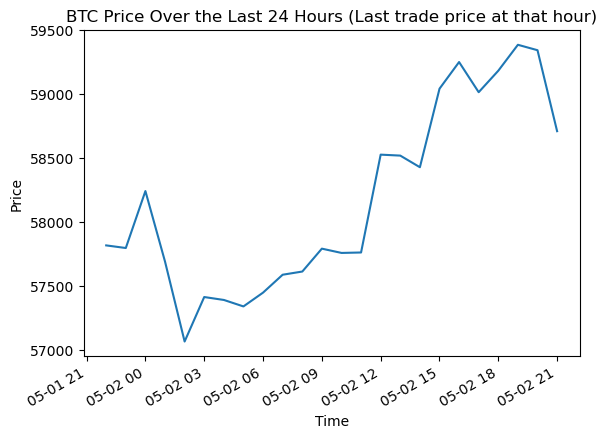

In [31]:

#Lets plot the BTC price
import matplotlib.pyplot as plt
plt.plot(BTC_data['timestamp'], BTC_data['price'])
#Lets format the x axis to make it more readable
plt.gcf().autofmt_xdate()
#Lets add labels
plt.title('BTC Price Over the Last 24 Hours (Last trade price at that hour)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

Options Price

In [ ]:

def get_last_trades_by_currency(instrument_name, start_time, end_time, count):
    # Convert timestamps to milliseconds since epoch
    end_timestamp = int(time.mktime(end_time.timetuple()) * 1000)
    start_timestamp = int(time.mktime(start_time.timetuple()) * 1000)

    #Get options

    # Establish a connection to Deribit's WebSocket API
    ws = websocket.create_connection('wss://www.deribit.com/ws/api/v2')

    # Define your authentication message
    auth_message = {
        "jsonrpc": "2.0",
        "id": 1,
        "method": "public/auth",
        "params": {
            "grant_type": "client_credentials",
            "client_id": api_key,
            "client_secret": api_secret
        }
    }

    # Send the authentication message
    ws.send(json.dumps(auth_message))
    response = ws.recv()
    print(response)

    # Define a message to get option trading information
    options_message = {
        "jsonrpc": "2.0",
        "id": 2,
        "method": "public/get_last_trades_by_instrument_and_time",
        "params": {
            'instrument_name': instrument_name,
            'start_timestamp': start_timestamp,
            'end_timestamp': end_timestamp,
            'count' : count
        }
    }

    # Send the message to get options information
    ws.send(json.dumps(options_message))
    options_response = ws.recv()

    # Close the WebSocket connection
    ws.close()
    
    return options_response


In [38]:
x = get_last_trades_by_instrument_and_time("BTC-PERPETUAL", start_time, end_time, 1)

{"jsonrpc":"2.0","id":1,"result":{"token_type":"bearer","scope":"name:MQE block_trade:read connection trade:read wallet:read account:read custody:read mainaccount","refresh_token":"1746234513379.1US6uRGP.Xd0N_9xOdBaMb_d3sM_BE44ren_mT54TaDnZ-TJDJkoNfv7C8k4SF-eE2a8DL2qMvzlemny-xzZ4q_pZ5rtQyrulkTBSfMZ5AGskkDM8yUxSPdF8g9ELwui-ym3ceVOo_i_HAnpdua88i2tA3Iy0oI3F5iHdHxbyqOTJPuCp9vD13RF4wl6t2PVcuXLnZmafSxhzZpwXP8sZCyhSj35ybANCuEp7YK_5CrRn2YzMHyfLcN152XLvaq0r7fdPtaqYyvBgoZId0LZfh6OW0SXBOUkHdt9Akxj3wDHIrGdLkAgFDmnKUtDpeCM","expires_in":31536000,"access_token":"1746234513379.1VLimHMy.mA2wOi3lRptqqnQkoh4ijUwhR6fGvAE-989kvVQ-Gb937bnSBoObLO1FC88aVTq-p8V8QYiFtwLfYFIhPz-d_BFQw38GzUYUIn68zW3Bc6QXTbz5LBhsAvXzNKCL5uuKwPwmegXrSo0HdQje140MniUykD05sfTQGLMminqPSXlIXuLVOjCYgTkwBR4Du-I28pctM56hjuH5ZfL-L5FrEd5ZIBtfNOuSQkO3OaUjSaEgSVh5_bkaz4X4C9vWfdcoHpVlbeVGKGvU6yhmRAulCu1k1NWok0WismMH0SwDSRWK0lp-EkOWcBj7"},"usIn":1714698513379387,"usOut":1714698513379609,"usDiff":222,"testnet":false}


In [39]:
data_to_df(x)

,trade_id,contracts,instrument_name,tick_direction,trade_seq,mark_price,index_price,amount,direction,price,timestamp
0,300170564,1.0,BTC-PERPETUAL,0,206559062,59051.05,59081.0,10.0,buy,59040.5,2024-05-03 00:00:01.541
